In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

In [4]:
# tlxf = open("/Users/jwpilly/Desktop/seesaw_data/data2/TLX/TLX.csv")
# tlx = tlxf.read()
# tlx2 = []
# for l in tlx.split("\n"):
#     if len(l.strip()) == 0:
#         continue
#     ls = l.strip().replace("\ufeff", "").split(",")
#     for n in ls[2:]:
#         tlx2.append(",".join(ls[:2]) + "," + n)
# tlxf.close()
# tlxout = open("/Users/jwpilly/Desktop/seesaw_data/data2/TLX/TLX2.csv", "w")
# tlxout.write("\n".join(tlx2))
# tlxout.close()

In [3]:
def freq_string(x):
    if x == 600:
        return "1.67 Hz"
    elif x == 800:
        return "1.25 Hz"
    elif x == 1000:
        return "1 Hz"
tlx2_df = pd.read_csv("/Users/jwpilly/Desktop/seesaw_data/data2/TLX/TLX2.csv", header=None, names=["Frequency", "Dimension", "Value"])
tlx2_df.Frequency = tlx2_df.Frequency.apply(freq_string)

(0, 35)

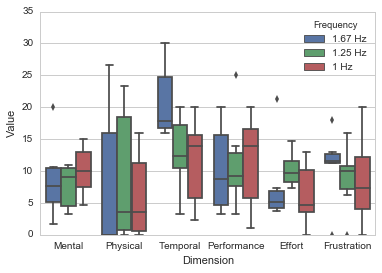

In [90]:
ax1 = sns.boxplot(x="Dimension", y="Value", hue="Frequency", data=tlx2_df[tlx2_df.Dimension != "Overall"])
plt.ylim(0, 35)

In [131]:
def tlx_dim(df, dim, freq):
    return df[(df.Dimension == dim) & (df.Frequency == freq)].Value.values

def tlx_freq_stat(df, dim):
    print(stats.ttest_ind(tlx_dim(df, dim, "1 Hz"), tlx_dim(df, dim, "1.25 Hz")))
    print(stats.ttest_ind(tlx_dim(df, dim, "1 Hz"), tlx_dim(df, dim, "1.67 Hz")))
    print(stats.ttest_ind(tlx_dim(df, dim, "1.25 Hz"), tlx_dim(df, dim, "1.67 Hz")))

In [125]:
def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

In [126]:
tlx_freq_stat(tlx2_df, "Overall")
print("\n")
tlx_freq_stat(tlx2_df, "Mental")
print("\n")
tlx_freq_stat(tlx2_df, "Physical")
print("\n")
tlx_freq_stat(tlx2_df, "Temporal")
print("\n")
tlx_freq_stat(tlx2_df, "Performance")
print("\n")
tlx_freq_stat(tlx2_df, "Effort")
print("\n")
tlx_freq_stat(tlx2_df, "Frustration")
print("\n")

Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


Ttest_indResult(statistic=1.0728406636950019, pvalue=0.30854952599648355)
Ttest_indResult(statistic=0.41452402770001917, pvalue=0.68724238346840849)
Ttest_indResult(statistic=-0.35452194575646867, pvalue=0.73030997478146387)


Ttest_indResult(statistic=-0.52533631380393786, pvalue=0.61079869717902335)
Ttest_indResult(statistic=-0.32544872163775357, pvalue=0.75154867382622137)
Ttest_indResult(statistic=0.13588487053734891, pvalue=0.89460880771099249)


Ttest_indResult(statistic=-0.30766619833069908, pvalue=0.76464868445526646)
Ttest_indResult(statistic=-2.4265625502960511, pvalue=0.035659206756373636)
Ttest_indResult(statistic=-2.3154237503209352, pvalue=0.043107439738037059)


Ttest_indResult(statistic=0.045685735352903732, pvalue=0.96446019369856195)
Ttest_indResult(statistic=0.28006767332593208, pvalue=0.78513359481787148)
Ttest_indResult(statistic=0.2341

In [98]:
print(exact_mc_perm_test(tlx_1, tlx_125, 100))
print(exact_mc_perm_test(tlx_1, tlx_167, 100))
print(exact_mc_perm_test(tlx_125, tlx_167, 100))

0.32
0.16
0.49


In [81]:
tlxf = open("/Users/jwpilly/Desktop/study3/tlx/TLX.csv")
tlx = tlxf.read()
tlx2 = []
for l in tlx.split("\n"):
    if len(l.strip()) == 0:
        continue
    ls = l.strip().replace("\ufeff", "").split(",")
    for n in ls[2:]:
        tlx2.append(",".join(ls[:2]) + "," + n)
tlxf.close()
tlxout = open("/Users/jwpilly/Desktop/study3/tlx/TLX.csv", "w")
tlxout.write("\n".join(tlx2))
tlxout.close()

In [82]:
tlx3_df = pd.read_csv("/Users/jwpilly/Desktop/study3/tlx/TLX.csv", header=None, names=["Frequency", "Dimension", "Value"])

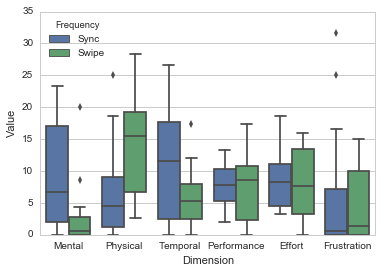

In [59]:
ax3 = sns.boxplot(x="Dimension", y="Value", hue="Frequency", data=tlx3_df[tlx3_df.Dimension != "Overall"])

In [164]:
def tlx_gesture_stat(df, dim):
    print(dim, "Sync", np.mean(np.array(tlx_dim(df, dim, "Sync"))), "Swipe", np.mean(np.array(tlx_dim(df, dim, "Swipe"))), stats.ttest_ind(tlx_dim(df, dim, "Sync"), tlx_dim(df, dim, "Swipe")))

In [165]:
tlx_gesture_stat(tlx3_df, "Overall")
print("\n")
tlx_gesture_stat(tlx3_df, "Mental")
print("\n")
tlx_gesture_stat(tlx3_df, "Physical")
print("\n")
tlx_gesture_stat(tlx3_df, "Temporal")
print("\n")
tlx_gesture_stat(tlx3_df, "Performance")
print("\n")
tlx_gesture_stat(tlx3_df, "Effort")
print("\n")
tlx_gesture_stat(tlx3_df, "Frustration")
print("\n")

Overall Sync 50.6944444442 Swipe 44.1944444439 Ttest_indResult(statistic=0.74687682665060529, pvalue=0.46304589792051098)


Mental Sync 8.86111111058 Swipe 3.22222222225 Ttest_indResult(statistic=1.9575665206635247, pvalue=0.063085552146997015)


Physical Sync 7.30555555592 Swipe 14.3055555548 Ttest_indResult(statistic=-1.9494297539310874, pvalue=0.064105479480531483)


Temporal Sync 11.1388888889 Swipe 5.99999999975 Ttest_indResult(statistic=1.745685603009411, pvalue=0.094818004444957513)


Performance Sync 7.72222222217 Swipe 7.83333333358 Ttest_indResult(statistic=-0.059159453476429501, pvalue=0.95335920108755134)


Effort Sync 8.83333333367 Swipe 7.91666666692 Ttest_indResult(statistic=0.40609286035266573, pvalue=0.68859729242620626)


Frustration Sync 6.83333333383 Swipe 4.91666666667 Ttest_indResult(statistic=0.52681245136174326, pvalue=0.60359574602144805)




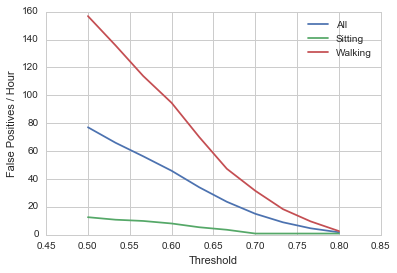

In [34]:
# fph vs threshold plot for autocorrelation
thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8]
fphs = [77.08, 65.97, 56.29, 45.89, 34.06, 23.66, 15.06, 8.96, 4.66, 1.79]
fphs_sit = [12.62, 10.82, 9.92, 8.11, 5.41, 3.61, 0.90, 0.90, 0.90, 0.90]
fphs_walk = [156.78, 135.76, 113.86, 94.59, 70.07, 47.30, 31.53, 18.39, 9.63, 2.63]
plt.plot(thresholds, fphs, label="All")
plt.plot(thresholds, fphs_sit, label="Sitting")
plt.plot(thresholds, fphs_walk, label="Walking")
plt.xlabel("Threshold")
plt.ylabel("False Positives / Hour")
plt.legend()
plt.show()

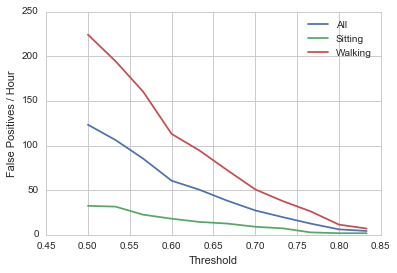

In [32]:
# fph vs threshold plot for correlation
thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8, 0.833]
fphs = [123.33, 106.12, 85.33, 60.59, 50.55, 38.36, 27.25, 19.72, 12.55, 6.09, 4.30]
fphs_sit = [32.45, 31.55, 22.54, 18.03, 14.42, 12.62, 9.01, 7.21, 2.70, 1.80, 1.80]
fphs_walk = [224.22, 194.44, 160.28, 112.98, 94.59, 72.70, 50.80, 37.66, 26.28, 11.39, 7.01]
plt.plot(thresholds, fphs, label="All")
plt.plot(thresholds, fphs_sit, label="Sitting")
plt.plot(thresholds, fphs_walk, label="Walking")
plt.xlabel("Threshold")
plt.ylabel("False Positives / Hour")
plt.legend()
plt.show()

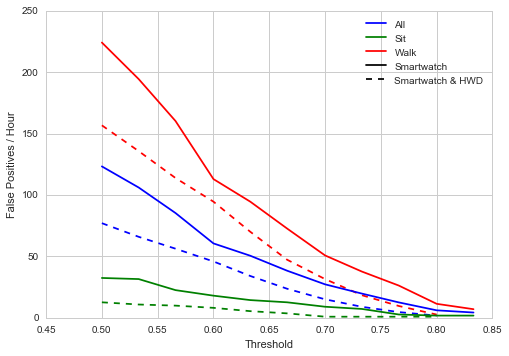

In [8]:
# false positive when sync top or bottom
# fph vs threshold plot for autocorrelation
a_thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8]
a_fphs = [77.08, 65.97, 56.29, 45.89, 34.06, 23.66, 15.06, 8.96, 4.66, 1.79]
a_fphs_sit = [12.62, 10.82, 9.92, 8.11, 5.41, 3.61, 0.90, 0.90, 0.90, 0.90]
a_fphs_walk = [156.78, 135.76, 113.86, 94.59, 70.07, 47.30, 31.53, 18.39, 9.63, 2.63]
plt.plot(a_thresholds, a_fphs, color="blue", linestyle="dashed")
plt.plot(a_thresholds, a_fphs_sit, color="green", linestyle="dashed")
plt.plot(a_thresholds, a_fphs_walk, color="red", linestyle="dashed")
# fph vs threshold plot for correlation
c_thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8, 0.833]
c_fphs = [123.33, 106.12, 85.33, 60.59, 50.55, 38.36, 27.25, 19.72, 12.55, 6.09, 4.30]
c_fphs_sit = [32.45, 31.55, 22.54, 18.03, 14.42, 12.62, 9.01, 7.21, 2.70, 1.80, 1.80]
c_fphs_walk = [224.22, 194.44, 160.28, 112.98, 94.59, 72.70, 50.80, 37.66, 26.28, 11.39, 7.01]
plt.plot(c_thresholds, c_fphs, color="blue", label="All")
plt.plot(c_thresholds, c_fphs_sit, color="green", label="Sit")
plt.plot(c_thresholds, c_fphs_walk, color="red", label="Walk")

plt.plot([], [], label="Smartwatch", color="black")
plt.plot([], [], linestyle="dashed", label="Smartwatch & HWD", color="black")

plt.xlabel("Threshold")
plt.ylabel("False Positives / Hour")
plt.legend()
plt.show()

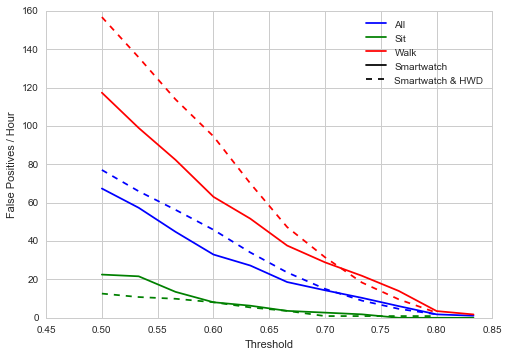

In [9]:
# false positive only when sync top
# fph vs threshold plot for autocorrelation
a_thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8]
a_fphs = [77.08, 65.97, 56.29, 45.89, 34.06, 23.66, 15.06, 8.96, 4.66, 1.79]
a_fphs_sit = [12.62, 10.82, 9.92, 8.11, 5.41, 3.61, 0.90, 0.90, 0.90, 0.90]
a_fphs_walk = [156.78, 135.76, 113.86, 94.59, 70.07, 47.30, 31.53, 18.39, 9.63, 2.63]
plt.plot(a_thresholds, a_fphs, color="blue", linestyle="dashed")
plt.plot(a_thresholds, a_fphs_sit, color="green", linestyle="dashed")
plt.plot(a_thresholds, a_fphs_walk, color="red", linestyle="dashed")
# fph vs threshold plot for correlation
c_thresholds = [0.5, 0.533, 0.566, 0.6, 0.633, 0.666, 0.7, 0.733, 0.766, 0.8, 0.833]
c_fphs = [67.40, 57.36, 44.82, 32.98, 27.25, 18.64, 14.34, 10.40, 6.09, 1.79, 1.08]
c_fphs_sit = [22.54, 21.63, 13.52, 8.11, 6.31, 3.61, 2.70, 1.80, 0, 0, 0]
c_fphs_walk = [117.36, 98.97, 82.33, 63.06, 51.68, 37.66, 28.90, 21.90, 14.01, 3.50, 1.75]
plt.plot(c_thresholds, c_fphs, color="blue", label="All")
plt.plot(c_thresholds, c_fphs_sit, color="green", label="Sit")
plt.plot(c_thresholds, c_fphs_walk, color="red", label="Walk")

plt.plot([], [], label="Smartwatch", color="black")
plt.plot([], [], linestyle="dashed", label="Smartwatch & HWD", color="black")

plt.xlabel("Threshold")
plt.ylabel("False Positives / Hour")
plt.legend()
plt.show()